##GymEase: Gym Customers Churn Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('gym_churn_us.csv')

In [2]:
df.head()

,gender,Near_Location,Partner,Phone,Contract_period,Age,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,0,6,29,5,0.020398,0.000000,0
1,0,1,0,1,12,31,12,1.922936,1.910244,0
2,0,1,1,1,1,28,1,1.859098,1.736502,0
3,0,1,1,1,12,33,12,3.205633,3.357215,0
4,1,1,1,1,1,26,1,1.113884,1.120078,0


###General data distribution of numerical features

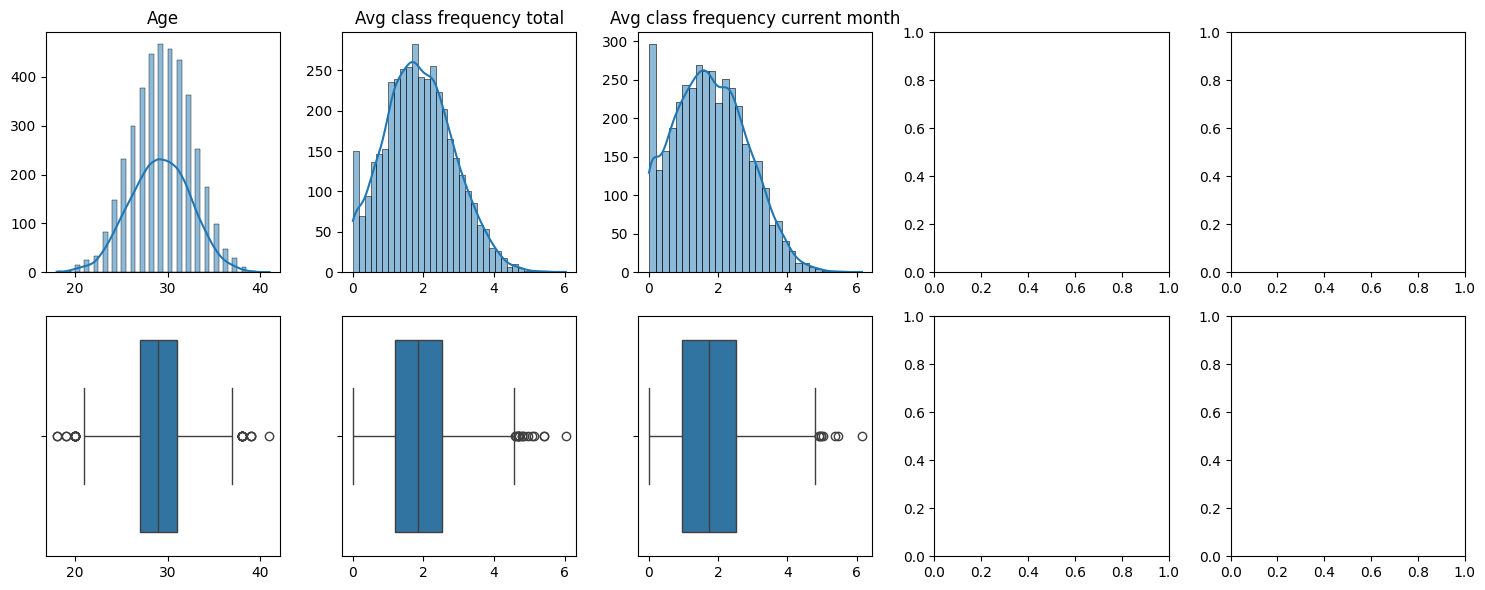

In [3]:
cats = [i for i in df.columns if df[i].nunique() <= 12]
nums = [i for i in df.columns if i not in cats]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    index = 0

    sns.histplot(df, x=j, kde=True, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j.replace('_', ' '))
    index += 1
    sns.boxplot(df, x=j, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")

plt.tight_layout()
plt.show()

###Numerical features distribution for churned and non-churned customers

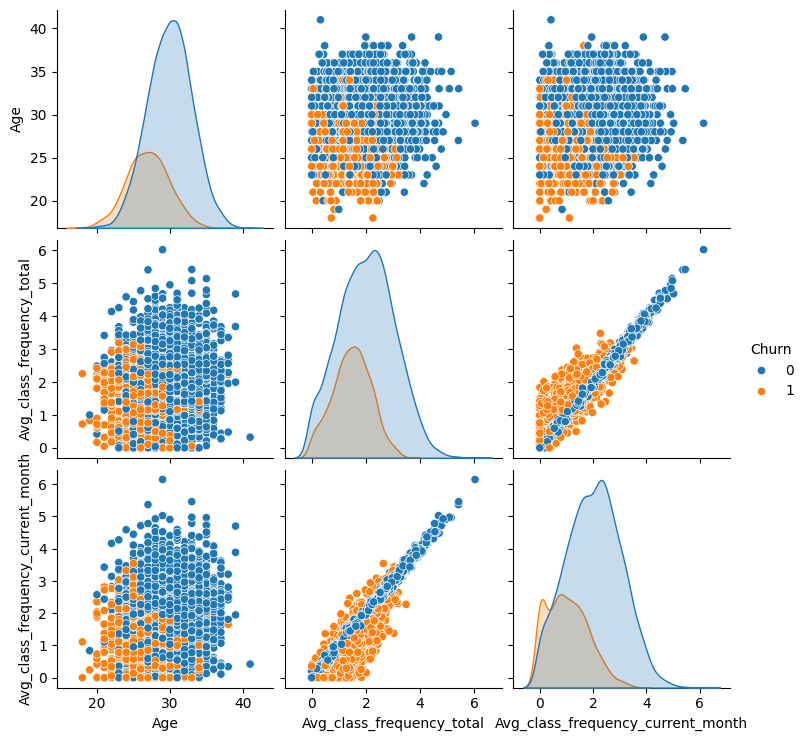

In [4]:
sns.pairplot(df, vars=nums, hue=cats[-1])
plt.show()

###Heatmap

<Axes: >

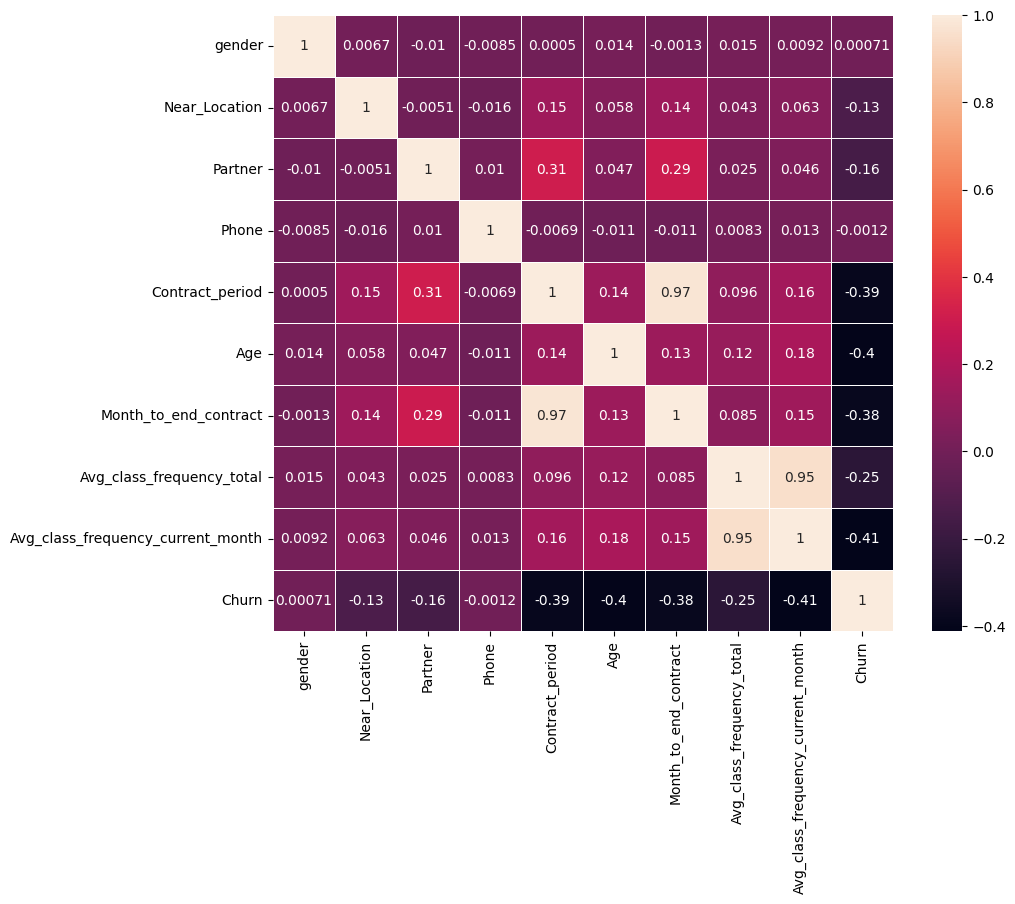

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

###Training Model

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
Y = df['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

Using Random Forest Classifier
F1 Score:  0.7659574468085106




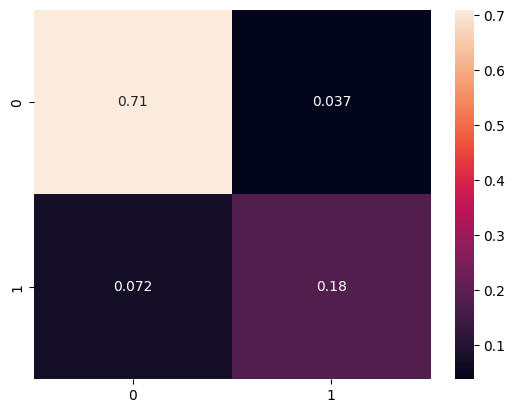

In [7]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import joblib


model = RandomForestClassifier()

model.fit(X_train,Y_train)
# Save
joblib.dump(model, 'random_forest_churn_predictor.pkl')

# Load
model = joblib.load('random_forest_churn_predictor.pkl')
ypred = model.predict(X_test)
print('Using Random Forest Classifier')
print('F1 Score: ',f1_score(Y_test,ypred))
print('\n')
sns.heatmap(confusion_matrix(Y_test,ypred)/np.sum(confusion_matrix(Y_test,ypred)),annot=True)
plt.show()